[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/6.5%20cufflinks%20%EB%A1%9C%20QuantFig%20%EA%B7%B8%EB%A6%AC%EA%B8%B0-input.ipynb)


<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png">

이미지 출처 : [Overviews — PyViz 0.0.1 documentation](https://pyviz.org/overviews/index.html)

## pandas의 plot 문법으로 plotly를 사용할 수 있는 cufflinks

* 판다스의 plot 을 iplot으로 변경만 하면 plotly의 동적(interactive)인 시각화 기능을 사용할 수 있습니다.
* 기본적인 판다스 plot 뿐만 아니라 증권데이터 분석을 위한 **캔들차트, 볼린저밴드, MACD, RSI** 지표를 그려볼 수도 있습니다.
* plotly 의 Financial Charts 에 비해 기술적 분석 지표를 따로 계산하지 않고 코드 한 두 줄로 그려볼 수 있다는 장점이 있습니다.
* [santosjorge/cufflinks: Productivity Tools for Plotly + Pandas](https://github.com/santosjorge/cufflinks)
* <font color="red">⚠️주의사항⚠️ : 다양한 라이브러리의 추상화된 고수준 인터페이스를 제공하기 있기 때문에 환경에 따라 라이브러리 버전간의 충돌이나 오류가 발생할 수 있습니다.</font> 

## 라이브러리 로드

In [1]:
# 주피터 노트북에서 설치가 안될 경우 터미널을 열어서 실행해준다.
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=f074e1bb32d44adf7c852f76c7f23207c033003b4188561fe4f7983247d34bd3
  Stored in directory: c:\users\kyung\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [2]:
# 데이터 분석을 위한 pandas
# pandas로 plotly 시각화를 할 수 있는 cufflinks 로드하기
import pandas as pd
import cufflinks as cf

In [3]:
# 그래프가 주피터 노트북에서 표시되지 않는다면 아래 설정을 사용해 주세요.
cf.go_offline(connected = True)

In [4]:
# 강의에서 사용하는 버전보다 낮은 버전을 사용하면 동작하지 않을 수도 있습니다.
cf.__version__

'0.17.3'

## cufflinks 내장 데이터 불러오기

In [5]:
cf.datagen.ohlc()

,open,high,low,close
2015-01-01,100.000000,101.139468,72.667710,85.072394
2015-01-02,85.688395,103.215687,79.617159,98.542851
2015-01-03,96.988515,97.502113,66.743300,80.284162
2015-01-04,80.372566,84.338784,55.313447,63.845814
2015-01-05,65.400866,92.047217,61.767676,92.047217
...,...,...,...,...
2015-04-06,244.334190,246.357645,225.125065,237.614539
2015-04-07,238.423924,242.146610,216.273774,217.001752
2015-04-08,217.111218,217.111218,179.343598,180.577441
2015-04-09,180.547764,190.008786,175.337255,177.823035


In [6]:
cf.datagen.ohlcv()

,open,high,low,close,volume
2015-01-01,100.000000,109.545341,86.460366,98.439893,1146
2015-01-02,98.109171,99.286317,74.629960,83.315998,8176
2015-01-03,85.217921,90.855435,64.832032,80.940308,1074
2015-01-04,81.271688,92.572279,69.019647,81.970022,8608
2015-01-05,81.238178,102.800563,76.467643,79.298051,4388
...,...,...,...,...,...
2015-04-06,-96.403408,-89.242926,-105.331228,-95.720475,1349
2015-04-07,-94.978912,-67.517747,-95.509668,-74.148134,7256
2015-04-08,-74.499263,-54.957688,-79.782306,-55.319617,8225
2015-04-09,-53.188370,-30.360485,-53.188370,-45.931210,3772


In [7]:
df = cf.datagen.ohlcv()
df.shape

(100, 5)

## pandas를 통한 OHLC 데이터 시각화 하기

<AxesSubplot:>

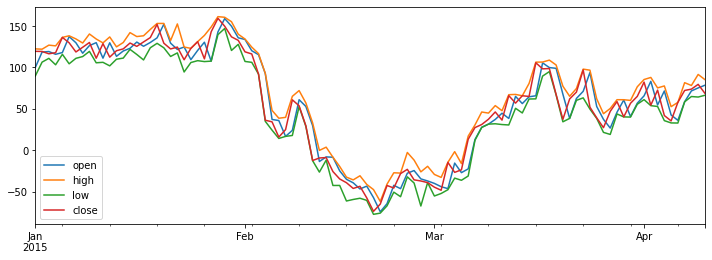

In [8]:
# "open", "high", "low", "close"
df[["open", "high", "low", "close"]].plot(figsize=(12,4))

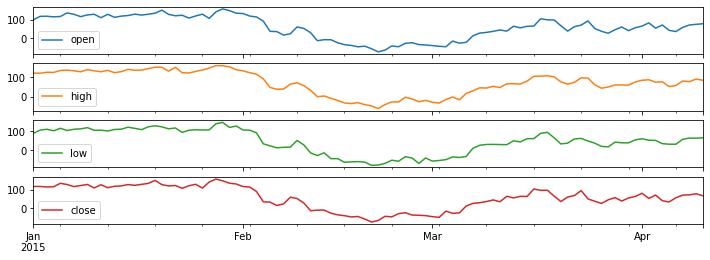

In [11]:
# subplots 그리기
f = df[["open", "high", "low", "close"]].plot(figsize=(12,4), subplots=True)

## cufflinks 를 통한 plotly 쉽게 사용하기

In [10]:
# pandas의 plot을 iplot으로 바꾸면 plotly로 시각화 합니다.
df[["open", "high", "low", "close"]].iplot()

In [12]:
# pandas의 plot을 iplot으로 바꾸면 plotly로 시각화 합니다.
df[["open", "high", "low", "close"]].iplot(subplots=True)

## cufflinks 의 QuantFig 사용하기
* QuantFig 를 사용하면 캔들차드와 보조 지표 몇 가지를 쉽게 그려볼 수 있습니다.

In [15]:
qf = cf.QuantFig(df, name="캔들차트")

In [16]:
# qf.iplot() 으로 시각화 합니다.
qf.iplot()

## QuantFig 로 볼린저 밴드 그리기

[santosjorge/cufflinks: Productivity Tools for Plotly + Pandas](https://github.com/santosjorge/cufflinks)

In [19]:
# add_bollinger_bands 로 볼린저 밴드를 추가합니다.
qf.add_bollinger_bands(name="볼린저밴드")

In [20]:
# qf.iplot() 으로 그래프를 보여줍니다.
qf.iplot()

In [21]:
# QuantFig 를 통해 이동평균, 볼린저밴드, RSI, 거래량, MACD 값을 그립니다
qf = cf.QuantFig(df, name="캔들차트")
qf.add_rsi(periods=20,color='java')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_macd()
qf.add_volume()
qf.iplot()

## 특정 주가를 가져와서 시각화 하기

In [22]:
# FinanceDataReader 로 테슬라: TSLA 주가 가져오기
import FinanceDataReader as fdr
tsla = fdr.DataReader("TSLA", "2020", "2021")
tsla.shape

(253, 6)

In [23]:
tsla.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,86.05,84.90,86.14,84.34,47790000.0,0.0284
2020-01-03,88.60,88.10,90.80,87.38,88970000.0,0.0296
2020-01-06,90.31,88.09,90.31,88.00,50790000.0,0.0193
2020-01-07,93.81,92.28,94.33,90.67,91050000.0,0.0388
2020-01-08,98.43,94.74,99.70,93.65,156000000.0,0.0492


In [29]:
# QuantFig 를 통한 테슬라 주가 시각화
qf = cf.QuantFig(tsla, name="캔들차트")
qf.add_sma([30, 60], color=["red", "blue"])
qf.add_rsi(periods=20,color='java')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_macd()
qf.add_volume()
qf.iplot()